In [ ]:
#Dataset : the Iris dataset available in the sklearn library.

# Loading and preprocessing

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data
#Drop the species column (not present as it's not a DataFrame yet)
# No need to drop since species isn't in this DataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# Checking for missing values
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
KMeans_Cluster       0
dtype: int64


# 2.Clustering Algorithm Implementation

A) KMeans Clustering

KMeans clustering is an iterative algorithm that partitions a dataset into K distinct clusters. 

The algorithm works by:

1. Initialization

* Choose the number of clusters (K): You need to decide how many clusters you want to identify in your data.
* Randomly initialize K centroids: These are points in the feature space that will represent the center of each cluster.
    
2. Assignment Step

* For each data point in the dataset, calculate the distance to each of the K centroids.
* Assign each data point to the nearest centroid. This means each point belongs to the cluster represented by the closest centroid.

3. Update Step

*Once all points are assigned, recalculate the positions of the K centroids. This is done by taking the mean of all data points assigned to each cluster.

4. Iteration

Repeat the assignment and update steps until convergence.
Convergence occurs when:
 *The centroids no longer change significantly.
 *The assignments of data points to clusters remain the same.

5. Output

The final output consists of K clusters, each represented by its centroid, along with the assignments of all data points to these clusters.

Suitability for the Iris dataset: KMeans is suitable for the Iris dataset because:

* It is a numerical dataset with continuous features.

* The clusters in the dataset are expected to be spherical in shape, which aligns with KMeans's assumption of isotropic clusters.

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data)

data


C:\Users\saran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


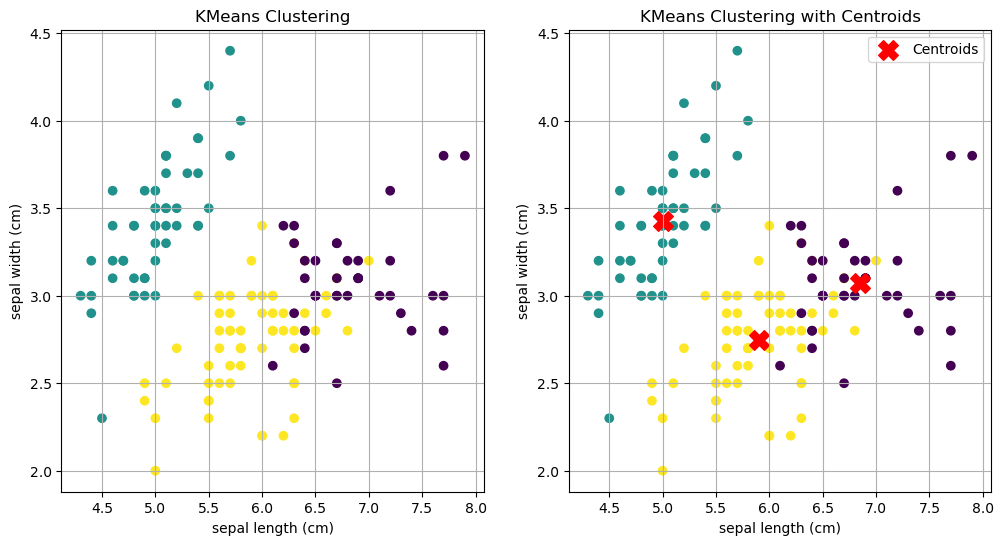

In [4]:
# Visualization
plt.figure(figsize=(12, 6))

# Plotting first two features
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)

# Plotting with centroids
plt.subplot(1, 2, 2)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.legend()

plt.show()

B) Hierarchical Clustering

Description: Hierarchical clustering builds a tree-like structure (dendrogram) to represent data points. It can be:

1.Agglomerative (bottom-up): Starts with each point as its own cluster and merges them based on distance until one cluster remains.

2.Divisive (top-down): Starts with one cluster containing all data points and splits them into smaller clusters.
    
Suitability for the Iris dataset: Hierarchical clustering is suitable for the Iris dataset because:

* It does not require specifying the number of clusters in advance.
* The dendrogram can help visualize the data structure and relationships between clusters.

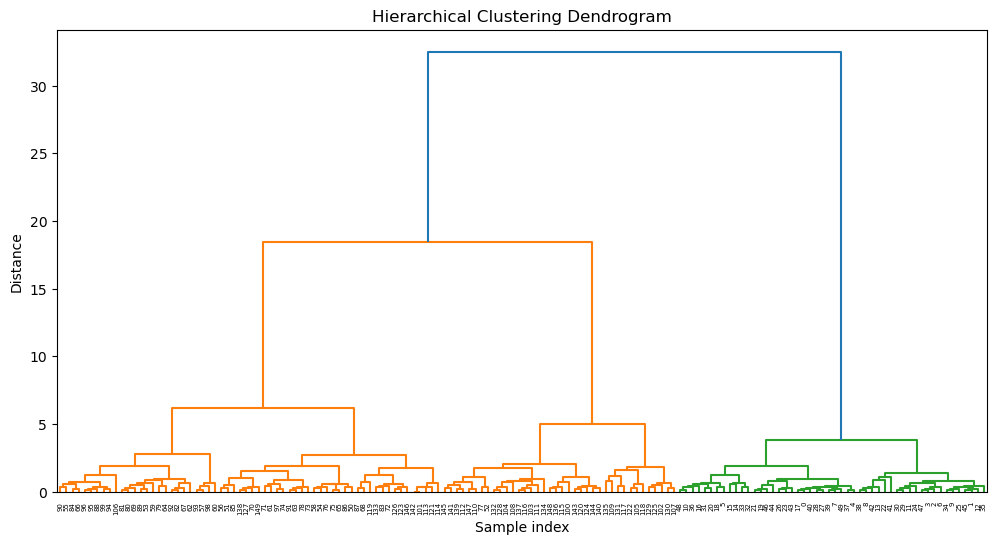

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Applying Hierarchical clustering
linked = linkage(data, method='ward')

# Visualization
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


conclusion:
    KMeans is efficient for spherical cluster shapes, while Hierarchical clustering provides a more detailed structure without needing predefined clusters. Both methods can yield insights into the relationships between the data points.